### Visualisation Optimisation Results

In [1]:
import os
from pathlib import Path
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import sys, os
sys.path.insert(0, os.path.abspath('../../src'))  # from docs/notebooks to src
import bso.visualisation as vis
import seaborn as sns

# Overview of MILP Results

In [2]:
# import results
input_path = os.path.join("..","..","results","battery_week_results.csv")
# Parse the timestamp column on read, then make it the index
df = pd.read_csv(input_path, parse_dates=["datetime"])
df = df.set_index("datetime").sort_index()
# import imbalance prices
input_path = os.path.join("..","..", "data", f"imbalance_prices.csv")
prices = pd.read_csv(input_path)

## Plot Complete Week

/Users/lcbrafine/Documents/Sollicitaties 2024:2025/Vandebron/BatterySteeringOptimisation/src/bso/visualisation.py:244: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=(0.10, 0.0, 1.0, 0.98))


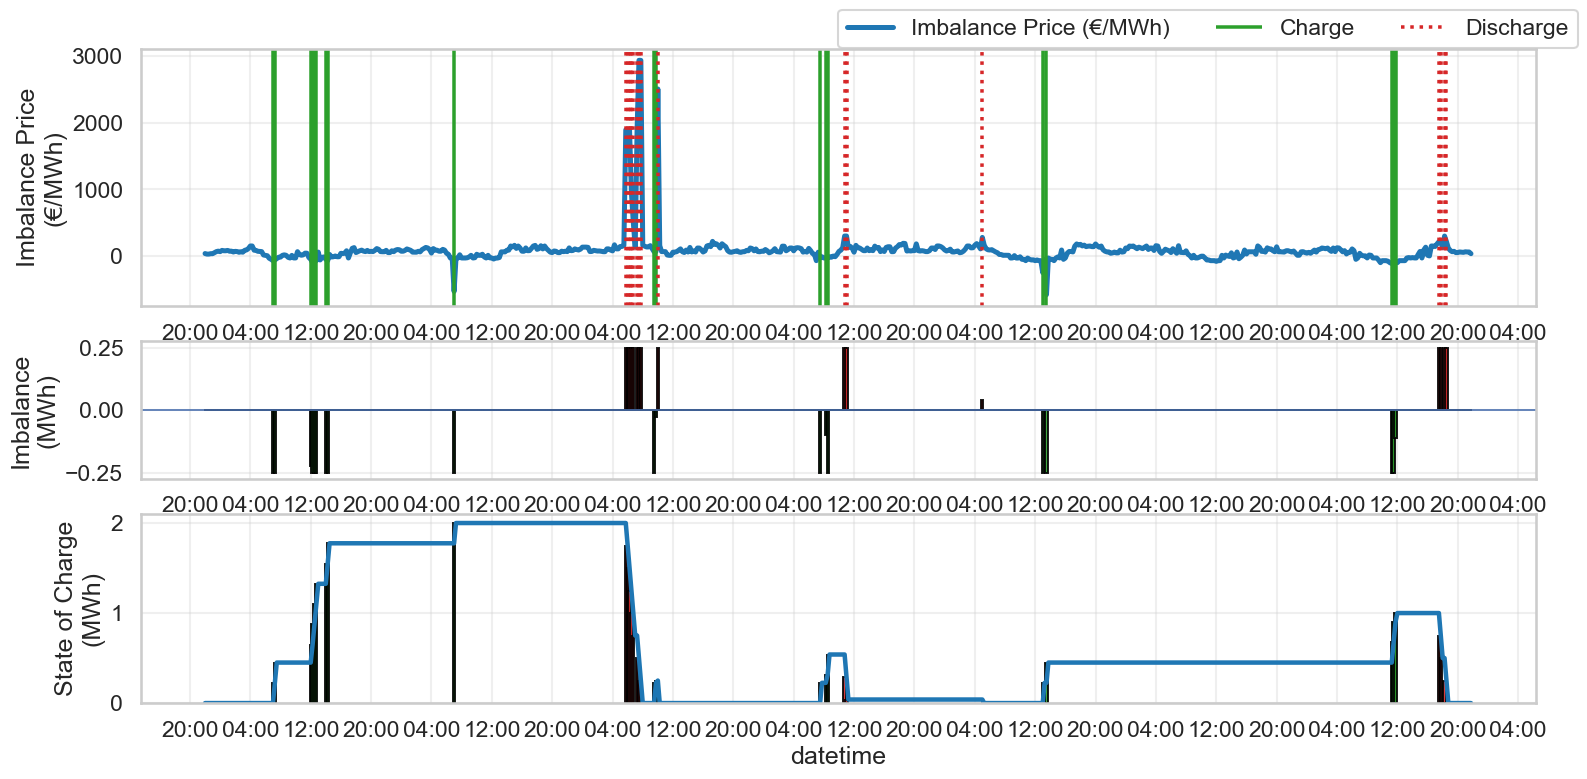

In [3]:
vis.plot_day_like_example_sns(
    df, price_col="price_long",
    start="2025-05-04", end="2025-05-11",
    linewidth_scale=1.8, bar_scale=1.5, edgewidth=1.4,
    hour_tick_interval=8, legend_outside=True,
)

## Plot Selected "Good Steering Day"

/Users/lcbrafine/Documents/Sollicitaties 2024:2025/Vandebron/BatterySteeringOptimisation/src/bso/visualisation.py:244: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=(0.10, 0.0, 1.0, 0.98))


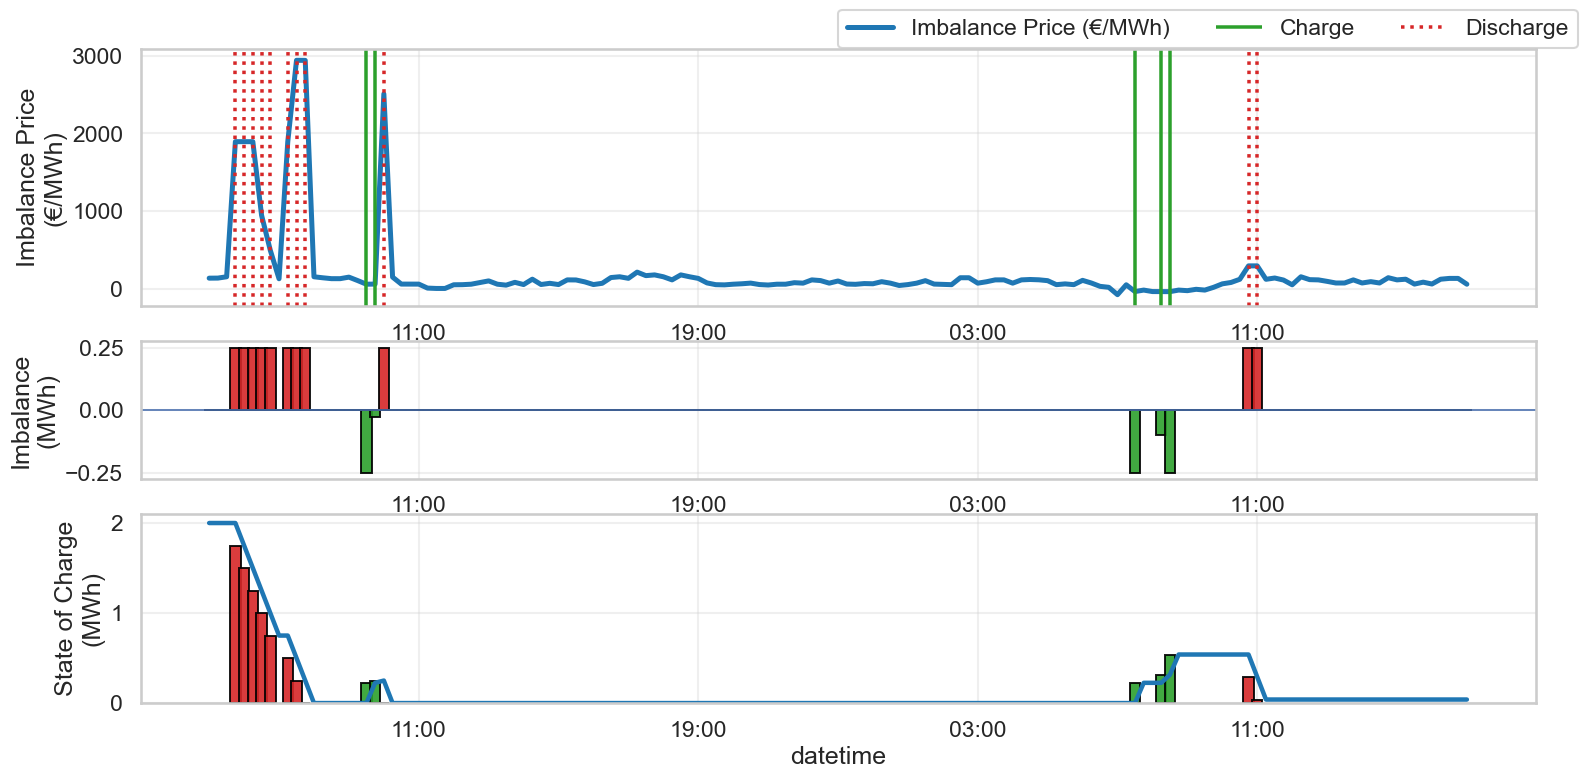

In [4]:
# Since the index is now a DatetimeIndex, don't pass time_col
vis.plot_day_like_example_sns(
    df, price_col="price_long",
    start="2025-05-07 05:00", end="2025-05-08 17:00",
    linewidth_scale=1.8, bar_scale=1.5, edgewidth=1.4,
    hour_tick_interval=8, legend_outside=True,
)


## Plot Weekly Cumulative Revenue

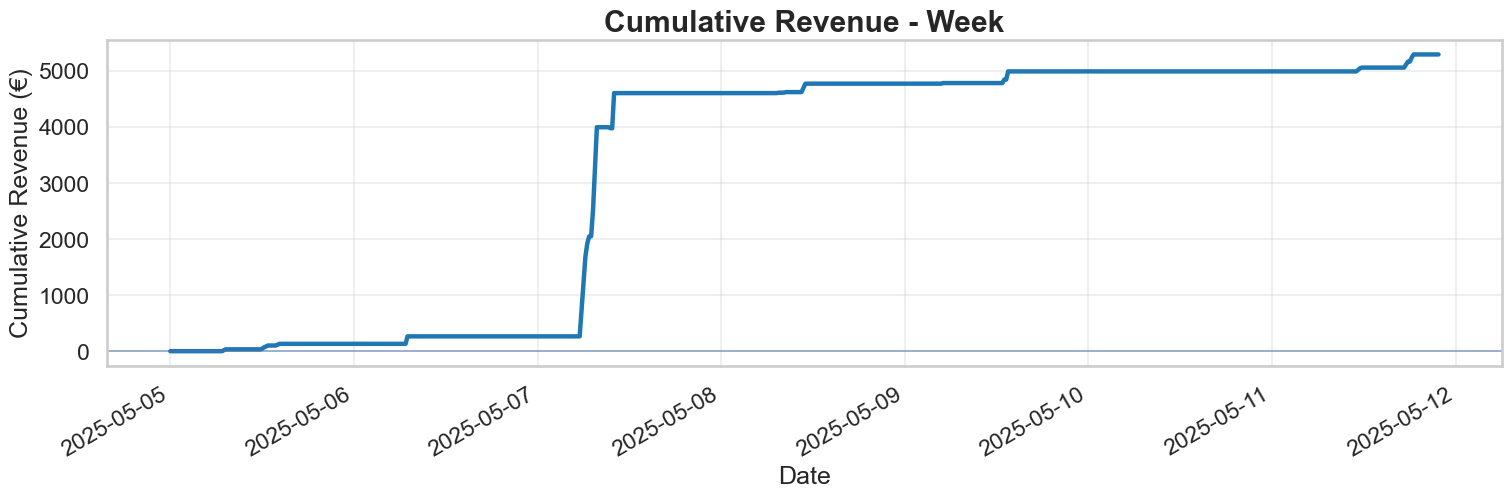

In [5]:
# custom window, start plotting 3 days after the window’s first date
vis.plot_cumulative_revenue_same_style(
    df, start="2025-05-03", end="2025-05-12",
    start_after_days=1, linewidth_scale=1.6
)

## Plot imbalance prices

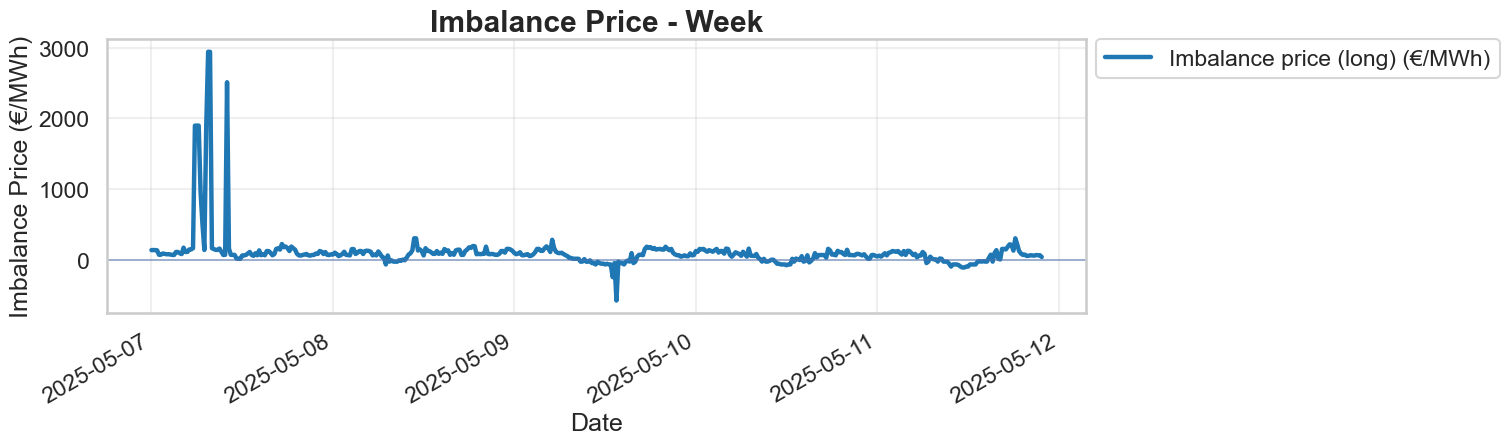

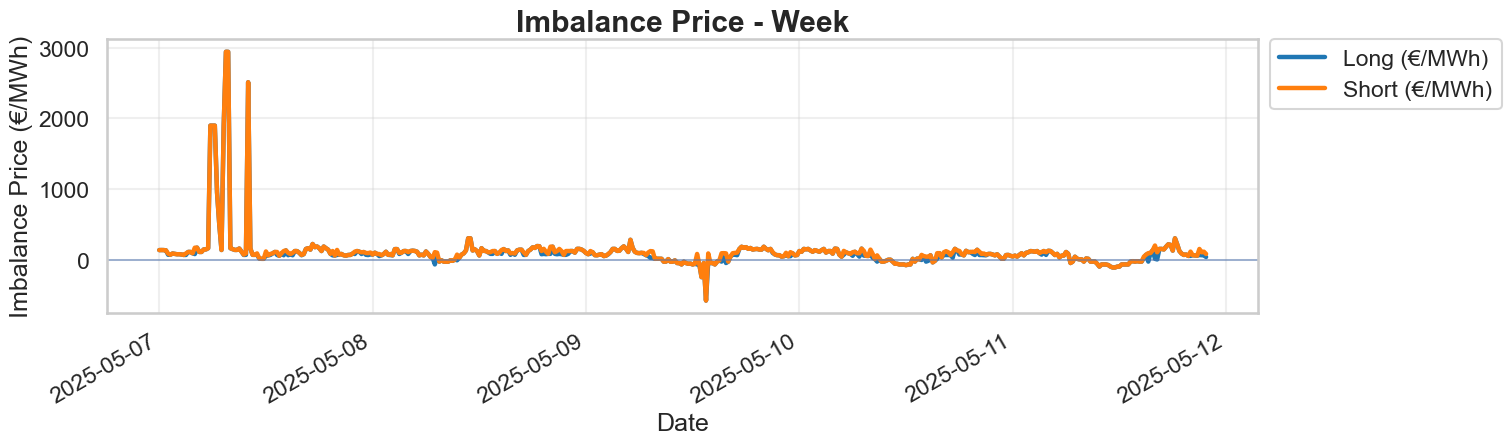

In [6]:
# Plot ONLY the long price (default), showing dates and starting after 3 days:
vis.plot_imbalance_prices_same_style(prices)

# Plot both long & short together:
vis.plot_imbalance_prices_same_style(prices, which="both",
                                 label_long="Long (€/MWh)", label_short="Short (€/MWh)")


## Plot Cumulative Revenue Greedy Alternative to MILP

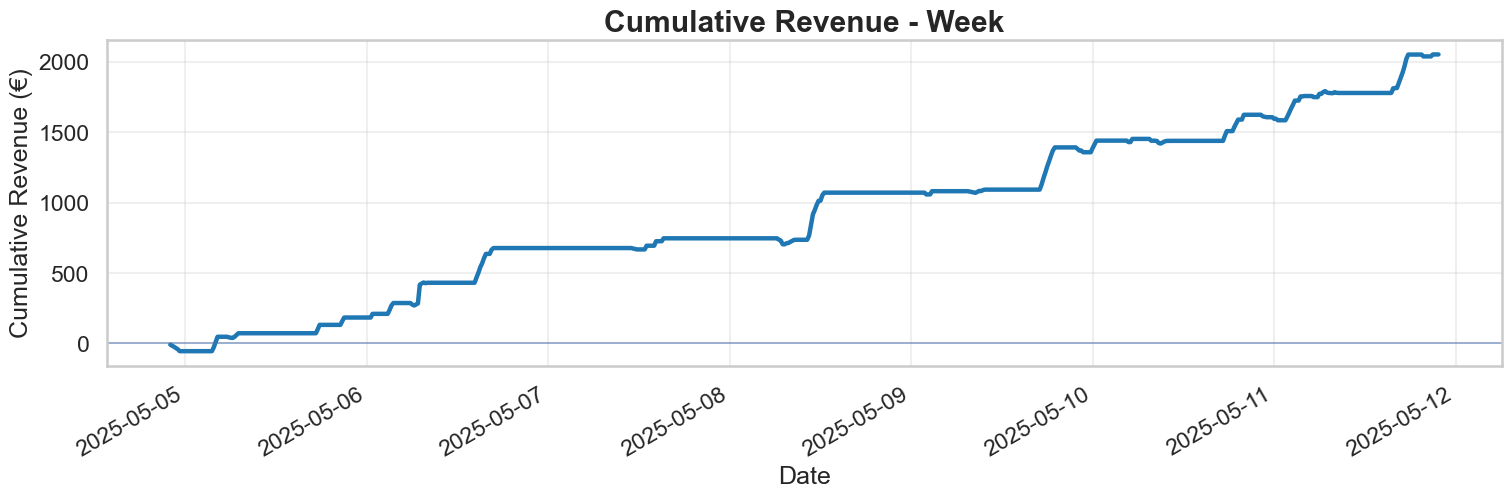

            revenue_eur  efc_used
datetime                         
2025-05-04   -55.565000  0.375000
2025-05-05   239.001513  0.797880
2025-05-06   493.323676  1.225730
2025-05-07    69.240000  0.356250
2025-05-08   324.195300  1.001388
2025-05-09   286.913300  1.307638
2025-05-10   248.866368  1.377046
2025-05-11   445.721826  1.744480


In [7]:
# 2) Run greedy baseline (uses your params)
res = vis.greedy_battery_trader(
    prices,
    # params from your prompt
    Delta_t=0.25,
    MAX_CAPACITY=2.0,
    MIN_CAPACITY=0.0,
    MAX_POWER=1.0,
    INIT_CAPACITY=0.0,
    EFFICIENCY=0.9,
    RAMP_CH=1.0,
    RAMP_DC=1.0,
    CYCLES_PER_DAY_MAX=2.0,
    DEG_COST_EUR_PER_MWH=1.5,
    # feel free to tweak thresholds
    low_q=0.30, high_q=0.70
)

# 3) Plot cumulative revenue in the same style
vis.plot_cumulative_revenue_same_style(
    res,
    revenue_col="revenue",
    time_col="datetime",
    start_after_days=0,      # set 3 if you want to start after 3 days
    linewidth_scale=1.6,
)

# Optional: quick peek at daily stats
daily = res.groupby(res["datetime"].dt.date).agg(
    revenue_eur=("revenue","sum"),
    efc_used=("efc_used_today","max")
)
print(daily)


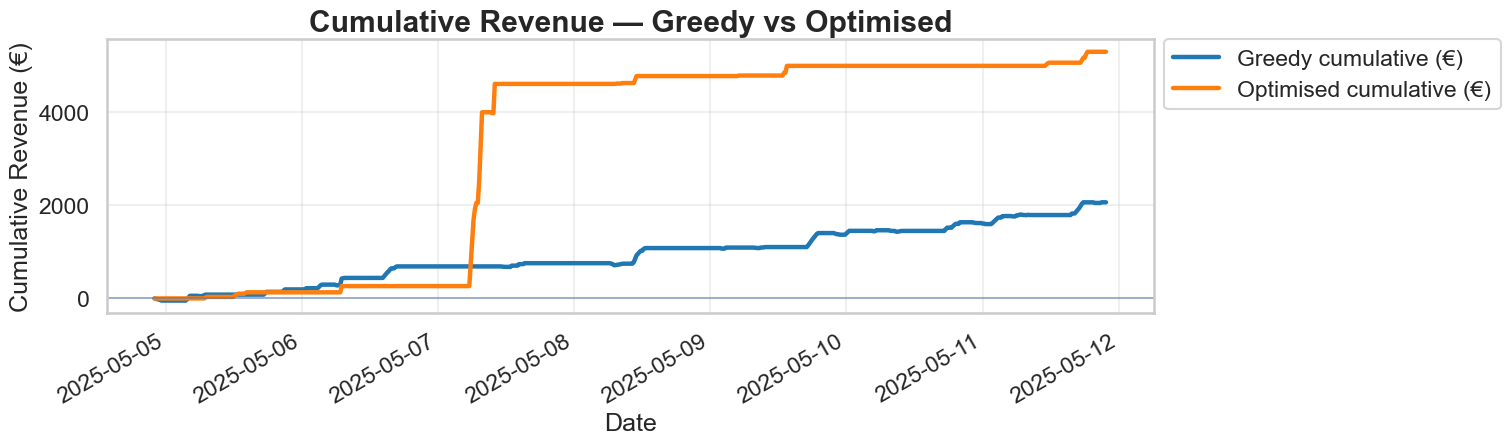

In [8]:
vis.plot_cumrev_greedy_vs_opt(
    res, df,
    greedy_rev_col="revenue", opt_rev_col="revenue",
    greedy_time_col="datetime", opt_time_col="datetime",
    start_after_days=0,      # set to 3 if you want to start plotting after 3 days
    rebase_at_cutoff=True,   # start both at zero at cutoff
    linewidth_scale=1.6,
    # title="Cumulative Revenue — Greedy vs Optimised",
    step=False               # True for step curves
)


## Print KPI's

In [9]:
k = vis.kpis_extended(df, time_col="START_DATETIME_UTC")


In [10]:
k


{'net_revenue_eur': 5288.211447368421,
 'export_revenue_eur': 4749.748157894737,
 'import_cost_eur': 538.4632894736842,
 'degradation_cost_eur': 11.999999999999998,
 'eur_per_mwh_throughput': 661.0264309210528,
 'eur_per_efc': 2644.105723684211,
 'best_day': (datetime.date(2025, 5, 7), 4334.971111111111),
 'worst_day': (datetime.date(2025, 5, 4), 0.0),
 'daily_volatility_eur': 1487.982540227126,
 'max_drawdown_eur': -19.52888888888856,
 'throughput_mwh': 7.999999999999999,
 'total_efc': 1.9999999999999998,
 'avg_efc_per_day': 0.25,
 'max_efc_per_day': 0.6319444444444444,
 'utilisation_pct': 5.208333333333334,
 'charge_pct': 2.8273809523809526,
 'discharge_pct': 2.380952380952381,
 'avg_abs_power_active_mw': 0.9142857142857143,
 'switches': 1,
 'soc_min': 0.0,
 'soc_avg': 0.6652921365914788,
 'soc_max': 2.0,
 'soc_at_min_pct': np.float64(26.041666666666668),
 'soc_at_max_pct': np.float64(13.541666666666666),
 'dual_windows_pct': 19.49404761904762,
 'dual_windows_revenue_share_pct': -0.3